# Ch 03 - Statistical Learning - Conceptual Exercises

<a id='index'></a>
### Index
1. [Interpreting coefficient p-values](#Interpreting-coefficient-p-values)
2. [KNN classifier vs KNN regression](#KNN-classifier-vs-KNN-regression)
3. [Salary after graduation](#Salary-after-graduation)
4. [Simple regression vs Cubic regression](#Simple-regression-vs-Cubic-regression)
5. [Linear regression without an intercept](#Linear-regression-without-an-intercept)
6. [Least squares line passes through $(\bar{x},\ \bar{y})$](#Least-squares-line-passes-through-$(\bar{x},\-\bar{y}%29$)
7. [Correlation and $R^2$ statistic in SLR](#Correlation-and-$R^2$-statistic-in-SLR)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Import packages

In [1]:
import numpy as np
import pandas as pd

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Interpreting coefficient p-values
<b>1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.</b>


<div align="center"><b>Table 3.4</b></div>
$$
\begin{array}{l|rrrr}
\hline & \text { Coefficient } & \text { Std. error } & \text { t-statistic } & \text { p-value } \\
\hline \text { Intercept } & 2.939 & 0.3119 & 9.42 & <0.0001 \\
\text { TV } & 0.046 & 0.0014 & 32.81 & <0.0001 \\
\text { radio } & 0.189 & 0.0086 & 21.89 & <0.0001 \\
\text { newspaper } & -0.001 & 0.0059 & -0.18 & 0.8599 \\
\hline
\end{array}
$$

<b>Answer:</b><br>
The p-values in the table correspond to the null hypothesis, &ensp; $H_0$ : $b_i$ = 0  
The null hypothesis is that there isn't a relationship between the relevant predictor variable and the response variable (Sales). 
Therefore, the assumption is that the coefficient, $b_i$ = 0.  
p-value tells us the probability of getting the coefficient value that the model has yielded, if the null hypothesis was true.  

**Null hypotheses & p-values**  

a) <b>Intercept</b><br>
- $H_0 : b_0 = 0$<br>
If the values for other predictors, $x_i$, were 0, i.e. if the advertising budgets for tv, radio & newspaper were 0, there would've been 0 base sales on an average. Put simply, there would be no sales in the absence of ads.<br><br>

- p-value = <0.0001<br>
The probability of getting a value = 2.939, if the true value for $b_0$ was 0, is less than 0.01%.  
Since the probability is negligible, we can safely reject $H_0$, and conclude that in the absence of tv, radio and newspapers ads, average base sales would not be 0.<br><br>

- $b_0$ = 2.939<br>
sales = 2.939 x 1000 = 2939 units<br>
<i>Note: sales figures are given in '000</i><br>
2939 units can be expected to be sold in absence of advertisments on TV, radio & newspaper.

<br>

b) <b>TV</b><br>
- $H_0 : b_1 = 0$<br>
In the presence of radio and newspaper ads (held constant), change in the budget of tv ads has 0 effect on sales on an average.<br><br>

- p-value = <0.0001<br> 
The probability of getting a value = 0.046, if the true value for $b_1$ was 0, is less than 0.0001.  
Since the probability is negligible, we can safely reject $H_0$, and conclude that if radio and newspaper ad budgets were held constant, the average effect of varying tv ad budget on average sales will not be 0.<br><br>

- $b_1$ = 0.046<br>
An increase of 1 unit in TV advertisment budget will result in 0.046(1000*) = 46 units increase in sales.

<br>

c) <b>radio</b><br>
- $H_0 : b_2 = 0$<br>
In the presence of tv and newspaper ads (held constant), change in the budget of radio ads has 0 effect on sales on an average.<br><br>

- p-value = <0.0001<br>
The probability of getting a value = 0.189, if the true value for $b_2$ was 0, is less than 0.01%.  
Since the probability is negligible, we can safely reject $H_0$, and conclude that if tv and newspaper ad budgets were held constant, the average effect of varying radio ad budget on average sales will not be 0.<br><br>

- $b_2$ = 0.189<br>
An increase of 1 unit in radio advertisment budget will result in 0.18+(1000) = 189 units increase in sales.

<br>

d) <b>newspaper</b><br>
- $H_0 : b_3 = 0$<br>
In the presence of tv and radio ads (held constant), change in the budget of newspaper ads has 0 effect on sales on an average.<br><br>

- p-value = 0.8599<br>
The probability of getting a value = -0.001, if the true value for $b_2$ was 0.  
The probability is significant, and so we do not have the statistical evidence to reject $H_0$. We can conclude that, with tv and radio ad budgets held constant, we can't expect the average sales to change due to a change in newspaper budget.<br><br>

- $b_3$ = 0<br>

Note [(source)](#https://botlnec.github.io/islp/sols/chapter3/exercise1/):
The probability of getting at least one significant p-value (i.e. p-value < 0.05) for the coefficients (when there are 4), when none of them < 0.05 is approx. 19%.  

$(1 - .95^4) = 0.1855$

[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### KNN classifier vs KNN regression
<b>2. Carefully explain the differences between the KNN classifier and KNN regression methods.</b>

<b>Answer:</b><br>
KNN expands to k nearest neighbors.  
It is a non-parametric method where you make estimations about a prediction point $x_0$, based on its k nearest neighbors (represented by $\mathcal{N}_{0}$).  
KNN classifier and KNN regression both work on this principle.<br>

<b>KNN classifier</b> is used when the motive is classification.
k nearest observations are selected and their classes identified.
Class prediction for $x_0$ is marked with the class that has the largest conditional probability. 
In other words, it is labeled with the class that has the highest proportion of members in $\mathcal{N}_0$.<br>

*Conditional probability* :  

$$P_{r} \ (Y = j | x = x_{0}) = \frac{1}{K} \sum_{i \in \mathcal{N}_{0}} I(y_{i} = j)$$


<i>Class prediction</i> :  

$$\hat{f}(x_{0}) = \underset{j}{\text{argmax}}(P_{r}(Y = j | x = x_{0}))$$

<br><br>

<b>KNN regressor</b> is used in case of a quantitative response variable.
Here again, k nearest neighbors to the prediction point $x_0$ are identified. 
$f(x_0)$ is estimated using $\mathcal{N}_0$ and prediction is made using the estimated $f(x_0)$.

*Estimated regression function* :
$$\hat{f}(x_{0}) = \frac{1}{K} \sum_{i \in \mathcal{N}_{0}} y_{i}$$


[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Salary after graduation
<b>3. Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 = −10.</b>

<b>(a) Which answer is correct, and why?  
i. For a fixed value of IQ and GPA, males earn more on average than females.  
ii. For a fixed value of IQ and GPA, females earn more on average than males.  
iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.  
iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.</b>

<b>Answer:</b><br>
iii. Men earn more, provided GPA is high enough.

Regression formula :  
**Y = 50 + 20.GPA + 0.07.IQ + 35.Gender + 0.01.(GPA x IQ) - 10.(GPA x Gender)**  

Difference between expected salaries post graduation:  
**E[y | Gender = 1] - E[y | Gender = 0] &nbsp; = &nbsp; 35 - 10.GPA**

For GPA < 3.5, the expected salary for women is more than men.  
For GPA > 3.5, the expected salary for men is more.

**(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.**

In [2]:
y = 50 + 20*4 + 0.07*110 + 35.1 + 0.01*4*110 - 10*4*1
print(f'The predicted starting salary is ${y*1000:,.0f}')

The predicted starting salary is $137,200


**(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.**  

<b>Answer:</b> False<br>
The evidence of the presence of a coefficient is evaluated by the p-value resulting from the hypothesis test of the coefficient being equal to 0. 
In this case, the coefficient of the interaction effect may be small, but that does not impugn its significance to the regression model.
The scale of coefficient depends upon the scale of the predictor as well as magnitude of its impact. So, a small coefficient for a predictor with large scale could ultimately have a significant impact on the predicted y value. 

[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Simple regression vs Cubic regression
<b>4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e.</b> &ensp;
$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

**(a) Suppose that the true relationship between X and Y is linear, i.e.** &ensp; $Y = \beta_0 + \beta_1X + \epsilon$.  
**Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

<b>Answer:</b><br>
On trying this out a few times on a simulated dataset (with linear relationship), both simple linear regression model and the cubic regression model gave similar results, albiet the training RSS of the cubic model was always slightly lower than that of the simple model.
That can be expected because a cubic model would be more flexible and hence have more leeway to fit closely to the data and would end up overfitting.

<br>

*See workings below*

**(b) Answer (a) using test rather than training RSS.**

<b>Answer:</b><br>
A model that overfits the training data, would be expected to perform poorly on new data. As such, the test RSS of the cubic model would be expected to more than that of the simple linear model.

**(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

<b>Answer:</b><br>
A cubic curve can take on a lot of different shapes. So, whatever relationship is there between X and Y, a cubic regression model would be able to map it more closely than a simple linear regression model. So, the training RSS of the cubic curve can be expected to be lower.

**(d) Answer (c) using test rather than training RSS.**

<b>Answer:</b><br>
Not enough information to tell.  
The test RSS would depend on the degree of non-linearity in the relationship between X and Y.
Cubic regression model can be expected to have the lower RSS in most cases because of its flexibility and the bias present in the simple linear regression's estimated function ($\hat{f}(x)$).  
Simple linear regression would likely have the lower test RSS if the relationship is only mildly non-linear.

#### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

##### <i>Simulating data with linear relationship
https://stackabuse.com/generating-synthetic-data-with-numpy-and-scikit-learn/

In [3]:
# Load packages
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style(rc={'figure.facecolor':'w'})

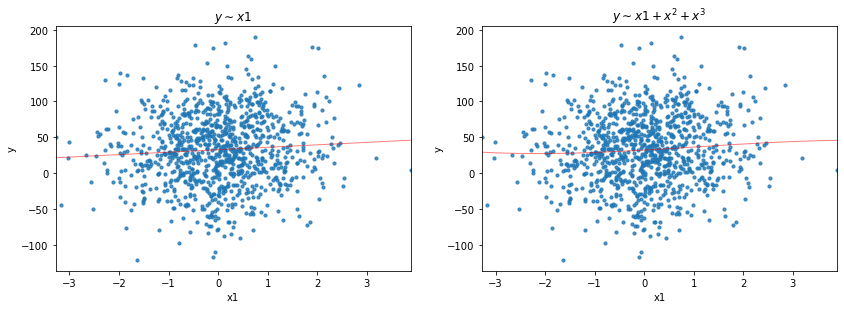

In [4]:
# Simulating data with linear relationship
features, output = datasets.make_regression(n_samples=1000, n_features=1, n_informative=1, 
                                            n_targets=1, noise=50, bias=30)
df = pd.DataFrame({'y':output, 'x1':features.ravel()})

# Plot with linear regression of order 1
plt.subplots(nrows=1, ncols=2, figsize=(14,4.5))
plt.subplot(121)
sns.regplot(x=df.x1, y=df.y, ci=None, scatter=True, order=1,
            line_kws={'lw':1,'color':'red','alpha':0.5}, 
            scatter_kws={'s':10,'alpha':0.8}).set_title('$y \sim x1$');

# Plot with linear regression of order 3
plt.subplot(122)
sns.regplot(x=df.x1, y=df.y, ci=None, scatter=True, order=3,
            line_kws={'lw':1,'color':'red','alpha':0.5}, 
            scatter_kws={'s':10,'alpha':0.8}).set_title('$y \sim x1 + x^2 + x^3$');

##### Simple regression model

In [5]:
# Model of order 1
model1 = smf.ols('y ~ x1', df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.848
Date:                Sun, 07 Mar 2021   Prob (F-statistic):             0.0279
Time:                        13:25:52   Log-Likelihood:                -5323.8
No. Observations:                1000   AIC:                         1.065e+04
Df Residuals:                     998   BIC:                         1.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.6181      1.571     20.756      0.000      29.534      35.702
x1             3.4217      1.554      2.202      0.028       0.372       6.471
==============================================================================
Omnibus:                        0.109   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.180
Skew:                           0.006   Prob(JB):                        0.914
Kurtosis:                       2.935   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Cubic regression model

In [6]:
## Model of order 3

# Create polynomials
df['x1_o2'] = df.x1 ** 2
df['x1_o3'] = df.x1 ** 3
df.head(2)

,y,x1,x1_o2,x1_o3
0,88.143684,0.647034,0.418653,0.270882
1,-29.260358,0.837537,0.701468,0.587505


In [7]:
# Model of order 3
model2 = smf.ols('y ~ x1 + x1_o2 + x1_o3', df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.693
Date:                Sun, 07 Mar 2021   Prob (F-statistic):              0.167
Time:                        13:25:52   Log-Likelihood:                -5323.7
No. Observations:                1000   AIC:                         1.066e+04
Df Residuals:                     996   BIC:                         1.068e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1606      1.895     16.969      0.000      28.441      35.880
x1             3.8834      2.423      1.603      0.109      -0.871       8.638
x1_o2          0.4465      1.034      0.432      0.666      -1.582       2.475
x1_o3         -0.1409      0.565     -0.250      0.803      -1.249       0.967
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.211
Skew:                           0.007   Prob(JB):                        0.900
Kurtosis:                       2.930   Cond. No.                         6.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

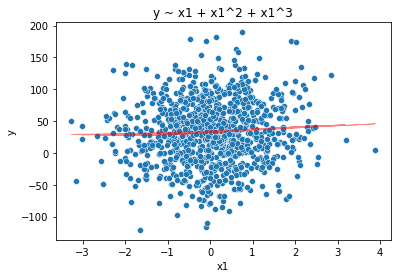

In [8]:
# Regression plot
sns.scatterplot(x=df['x1'], y=df['y'])
plt.plot(df['x1'], model2.predict(), color='red', linewidth=0.7, alpha=0.5)
plt.title('y ~ x1 + x1^2 + x1^3');

##### RSS, MSE, Prediction

In [9]:
# RSS & MSE
print(f'RSS = {((model1.fittedvalues - df.y)**2).sum().round(2)}')
print(f'MSE = {round(np.mean((model1.fittedvalues - df.y)**2), 2)}')

RSS = 2464563.56
MSE = 2464.56


In [10]:
# RSS & MSE
print(f'RSS = {((model2.fittedvalues - df.y)**2).sum().round(2)}')
print(f'MSE = {round(np.mean((model2.fittedvalues - df.y)**2), 2)}')

RSS = 2463970.43
MSE = 2463.97


 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

In [11]:
# Alternative
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# Order 1 model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(features, output)

# predictions
fitval = lin_reg.predict(features)

print('Coefficients : ', lin_reg.intercept_, lin_reg.coef_)
print('MSE : ', mean_squared_error(output, fitval))
print('R2 : ', r2_score(output, fitval))

Coefficients :  32.61814074604559 [3.42172335]
MSE :  2464.5635649472633
R2 :  0.004834311464471108


In [13]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([51.43761916])

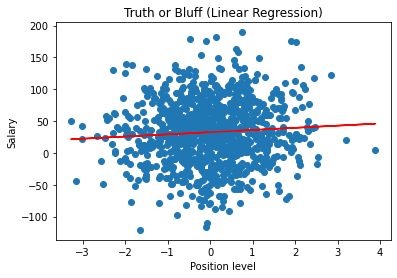

In [14]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(features, output)
    plt.plot(features, lin_reg.predict(features), color='red')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [15]:
## Order 3 model
# https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)

# Fitting Polynomial Regression to the dataset
X_poly = poly_reg.fit_transform(features)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, output)

# predictions
fitval = pol_reg.predict(X_poly)

print('Coefficients : ', pol_reg.intercept_, pol_reg.coef_)
print('MSE : ', mean_squared_error(output, fitval))
print('R2 : ', r2_score(output, fitval))

Coefficients :  32.16057385199155 [ 0.          3.88339319  0.44650403 -0.14093036]
MSE :  2463.9704340644703
R2 :  0.0050738116793414


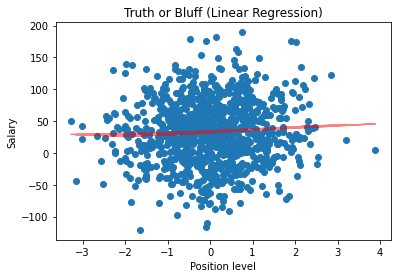

In [16]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(features, output)
    plt.plot(features, pol_reg.predict(poly_reg.fit_transform(features)), color='red', alpha=0.5)
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [17]:
# Predict
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([43.57869403])

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#index)

 &emsp; &emsp; &emsp; &emsp; &emsp;  <b>-----------------------------------------------------------------------------------------------------------------------------------------------------</b>

**(b) Answer (a) using test rather than training RSS.**

#### --&nbsp; <i>Workings</i> &nbsp; --------------------------------------------------------------

In [18]:
poly_reg = PolynomialFeatures(degree=3)

# Fitting Polynomial Regression to the dataset
X_poly = poly_reg.fit_transform(features)
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly, output)

LinearRegression()

##### train-test split

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import math

In [20]:
## Simple linear regression model

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.25, random_state=0)

# model trained on training set
slr = LinearRegression().fit(X_train, y_train)

In [21]:
# Polynomial regresssion model
# Creating polynomial features
X_poly = PolynomialFeatures(degree=3).fit_transform(features)

# Split data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_poly, output, test_size=0.25, random_state=0)

# Model trained on training set
polyr = LinearRegression().fit(X_train2, y_train2)

In [22]:
slr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [23]:
# fitted values
fv_train = slr.predict(X_train)
fv_test = slr.predict(X_test)

fv_train2 = polyr.predict(X_train2)
fv_test2 = polyr.predict(X_test2)

In [24]:
slr.intercept_, slr.coef_

(32.73984532881225, array([3.70357429]))

In [25]:
polyr.intercept_, polyr.coef_

(31.804204546333175,
 array([ 0.        ,  4.65157623,  0.92102125, -0.29528037]))

##### Regression report

In [26]:
def reg_report(y_actual, fitted_values, label='label'):
    report = pd.DataFrame(index=[label])
    report['r2_score'] = r2_score(y_actual, fitted_values)
    report['mse'] = mean_squared_error(y_actual, fitted_values)
    report['RSS'] = ((fitted_values - y_actual)**2).sum().round(2)
    return report

In [27]:
round(pd.concat([reg_report(y_train, fv_train, 'training'), 
                 reg_report(y_test, fv_test, 'test')], axis=0), 3)

,r2_score,mse,RSS
training,0.006,2472.714,1854535.77
test,0.002,2440.497,610124.20


In [28]:
round(pd.concat([reg_report(y_train2, fv_train2, 'training'), 
                 reg_report(y_test2, fv_test2, 'test')], axis=0), 3)

,r2_score,mse,RSS
training,0.007,2470.163,1852622.39
test,-0.001,2448.463,612115.64


In [29]:
r2_score(y_test, slr.predict(X_test))
# Negative r2_score means that the chosen model has a fit worse than a straight line

0.0020601346362654205

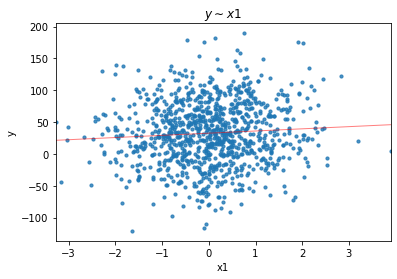

In [30]:
sns.regplot(x=df.x1, y=df.y, ci=None, scatter=True, order=1,
            line_kws={'lw':1,'color':'red','alpha':0.5}, 
            scatter_kws={'s':10,'alpha':0.8}).set_title('$y \sim x1$');

<b><i>--------------------------------------------------------------&nbsp; Workings &nbsp;--</i></b>

[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Linear regression without an intercept

**5. Consider the fitted values that result from performing linear regression without an intercept.  
In this setting, the ith fitted value takes the form:**
$$\hat{y}_i=x_i\hat{\beta}$$  
where:
$$\hat{\beta} = (\sum_{j=1}^{n}x_jy_j)/(\sum_{k=1}^{n}x_k^2)$$

**Show that we can write**
$$\hat{y}_i = \sum_{j=1}^{n}a_jy_j$$

**What is $a_j$?**

<b>Answer:</b><br>
References:
[1](https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions),
[2](https://onmee.github.io/assets/docs/ISLR/Linear-Regression.pdf)

$$
\begin{align*}
     \hat{y}_i & = x_i\hat{\beta} \\\\
     & = x_i \frac{\sum_{j=1}^{n}x_jy_j}{\sum_{k=1}^{n}x_k^2} \\\\
     & = \frac{\sum_{j=1}^{n}(x_j y_j) x_i}{\sum_{k=1}^{n}x_k^2} && \text{(since } x_i \text{ doesn't depend on } j \text{)}\\\\
     & = \sum_{j=1}^{n} \left (\frac{x_i x_j}{\sum_{k=1}^{n}x_k^2} \times y_j \right) && \text{(the summation over } k \text{ is a constant w.r.t } j \text{)}\\\\
     & = \sum_{j=1}^{n} \left (\frac{x_ix_j}{\sum_{k=1}^{n}x_k^2}\right) y_j\\\\
     & = \sum_{j=1}^{n}a_jy_j \\\\
\end{align*}
$$

[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Least squares line passes through $(\bar{x},\ \bar{y})$

**6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point $(\bar{x},\ \bar{y})$.**


***Equation 3.4***<br>
The least squares approach chooses $\hat\beta_0$ and $\hat\beta_1$ to minimize the RSS.  
Using some calculus, one can show that the minimizers are :
$$\hat\beta_{1} = \frac{\sum_{i = 1}^n(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i = 1}^n(x_i - \bar{x})^2} \\
\hat\beta_{0} = \bar{y} - \hat\beta_{1}\bar{x}$$

<b>Answer:</b><br>
The equation for the least squares line is 
$$
\begin{align*}
    y_i & = \hat\beta_0 + \hat\beta_1x_i \\
    y_i & = (\bar{y} - \hat\beta_{1}\bar{x}) + \hat\beta_1x_i && \text{(substituting } \hat\beta_0 \text{ from 3.4)}
\end{align*}
$$
So, when &emsp; $x_i = \bar{x}$ &emsp; &rarr; &emsp; $y_i = \bar{y}$

A line segment is made up of all the possible values between two points. 
For x, in case of simple linear regression, one of them will be $\bar{x}$ and will definitely be one of the coordinates for the least squares line.
Thus we can say that, the least squares line will always pass through $(\bar{x},\ \bar{y})$.

<div>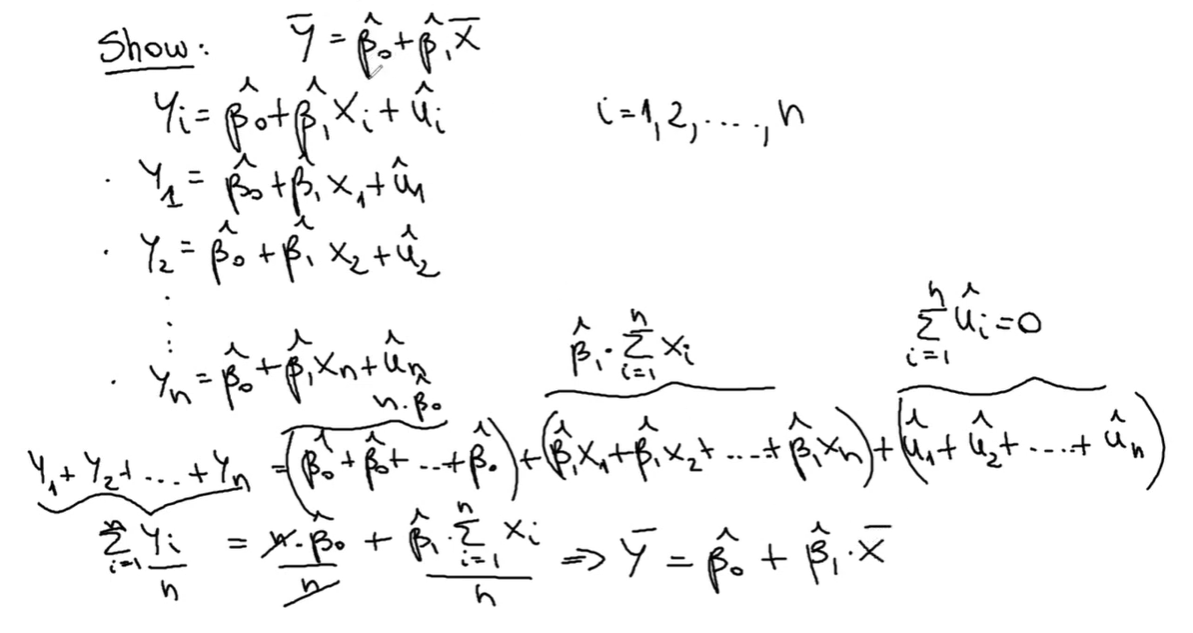 <a href="https://www.youtube.com/watch?v=HzwOZIYGn-c"> Reference </a> </div>



[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

### Correlation and $R^2$ statistic in SLR

**7. It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic is equal to the square of the correlation between X and Y. Prove that this is the case. For simplicity, you may assume that &nbsp; $\bar{x} = \bar{y} = 0$.**

<b>Answer:</b><br>
<a href="https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions">source</a><br>

We have to prove that : &nbsp;
$\Rightarrow \ R^2 = (Cor \ (x, y))^2$

We can assume that $\bar{x} = \bar{y} = 0$, so we can simplify our equations as below.
$$
\begin{align*} \\
\hat\beta_{0} & = \bar{y} - \hat\beta_1 \bar{x} \\ 
\hat\beta_{0} & = 0 & \\\\
\hat\beta_{1} & = \frac{\sum{(x - \bar{x}) (y - \bar{y})}}{\sum{(x - \bar{x})^2}} \\
\hat\beta_{1} & = \frac{\sum{xy}}{\sum{x^2}} \\\\
\hat{y} & = \hat\beta_0 + \hat\beta_1 x \\
\hat{y} & = 0 + \frac{\sum{xy}}{\sum{x^2}} \times x \\
\hat{y} & = x \ \frac{\sum{xy}}{\sum{x^2}} \\
\end{align*}
$$

<br>
$$
\begin{align*} \\
Cor(X, Y) &= \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sqrt{\sum{(x - \bar{x})^2}}\sqrt{\sum{(y - \bar{y})^2}}} 
&= \frac{\sum{xy}}{\sqrt{\sum{x^2}\sum{y^2}}} \\
Cor(X, Y)^2 &= \left( \frac{\sum{xy}}{\sqrt{\sum{x^2}\sum{y^2}}} \right)^2 
&= \frac{(\sum{xy})^2}{\sum{x^2}\sum{y^2}} && \leftarrow (1)
\end{align*}
$$


<br><br>

$$R^2 = 1 - \frac{RSS}{TSS}$$
<br>
$$TSS = \sum{(y - \bar{y})^2} = \sum{y^2}$$


Simplifying RSS  
$$
\begin{align*} \\
     RSS & = \sum{(y - \hat{y})^2} \\
     & = \sum{y^2 - 2y\hat{y} + \hat{y}^2} \\
     & = \sum{y^2 - 2y(\hat\beta_0 + \hat\beta_1 \ x) + (\hat\beta_{0} + \hat\beta_1 \ x)^2} && \text{(substituting } \; \hat{y} \; \text{ from above)} \\
     & = \sum{y^2 - 2\hat\beta_1 xy + \hat\beta_1^2 x^2} && (\hat\beta_0 = 0) \\
     & = \sum{y^2 - \sum{2\hat\beta_1 xy} + \sum{\hat\beta_1^2 x^2}} && \text{(properties of summations)} \\
     & = \sum{y^2 - 2\hat\beta_1 \sum{xy} + \hat\beta_1^2 \sum{x^2}} && \text{(taking constants outside - linearity property of summation)} \\
     & = \sum{y^2} - 2\left(\frac{\sum{xy}}{\sum{x^2}}\right)\sum{xy} + \left(\frac{\sum{xy}}{\sum{x^2}}\right)^2\sum{x^2} && \text{(substituting } \; \hat\beta_1 \; \text{ from above)} \\
     & = \sum{y^2} - 2\frac{(\sum{xy})^2}{\sum{x^2}} + \frac{(\sum{xy})^2}{\sum{x^2}} \\
     & = \frac{\sum{x^2\sum{y^2}} - (\sum{xy})^2}{\sum{x^2}}
\end{align*}
$$

Substituting RSS and TSS, as simplified, in $R^2$ formula:
$$
\begin{align*}
R^2 & = 1 - \frac{RSS}{TSS} \\
R^2 & = \frac{TSS - RSS}{TSS} \\
R^2 & = \frac{\sum{y^2} - \left[ \frac{\sum{x^2} \sum{y^2} \ - \ (\sum{xy})^2}{\sum{x^2}} \ \ \right]}{\sum{y^2}} \\
R^2 & = \frac{\sum{x^2}\sum{y^2} - \sum{x^2}\sum{y^2} + (\sum{xy})^2}{\sum{x^2}\sum{y^2}} \\
R^2 & = \frac{(\sum{xy})^2}{\sum{x^2}\sum{y^2}} \\\\
R^2 & = Cor(X, Y)^2 && \text{(from 1 above)}
\end{align*}
$$


[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

**References:**
- https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions
- https://onmee.github.io/assets/docs/ISLR/Linear-Regression.pdf
- https://botlnec.github.io/islp/sols/chapter3

<b> &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b>